# Part 5: application of unsupervised learning

In this part, we will use the dataset "Cars". (https://perso.telecom-paristech.fr/eagan/class/igr204/datasets)

First, here is how the dataset actually looks:


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv("cars.csv", sep=';', skiprows=[1])

print(df.head())

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         304.0       150.0   
4                Ford Torino  17.0          8         302.0       140.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3  3433.0          12.0     70     US  
4  3449.0          10.5     70     US  


# General analysis of the dataset:



Horsepower

Maximum: 230.0
Minimum: 0.0
Mean: 103.5295566502463
Std: 40.52065912106341

Weight

Maximum: 5140.0
Minimum: 1613.0
Mean: 2979.4137931034484
Std: 847.0043282393509


Text(0.5, 1.0, 'Car Model')

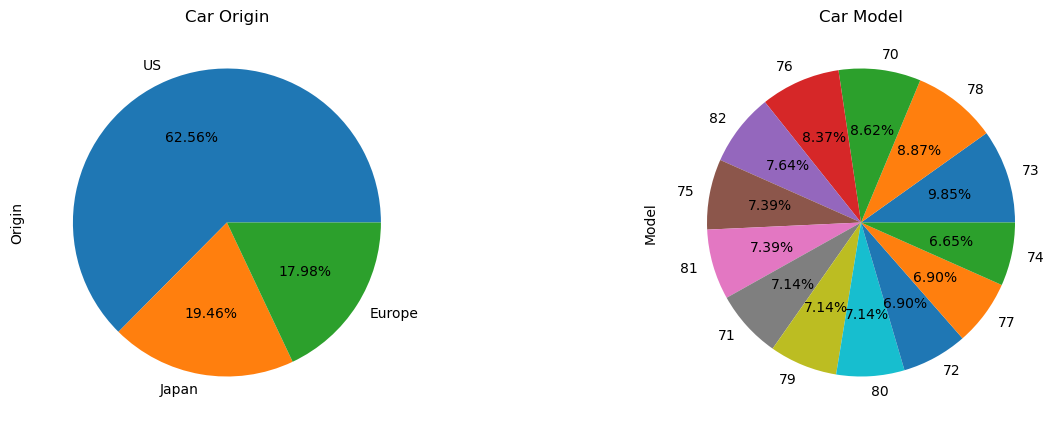

In [4]:
horsepower = df.Horsepower
print("\n===============\nHorsepower\n===============\n")
print("Maximum:", horsepower.max() )
print("Minimum:", horsepower.min() )
print("Mean:", horsepower.mean() )
print("Std:", horsepower.std() )

weight = df.Weight
print("\n===============\nWeight\n===============\n")
print("Maximum:", weight.max() )
print("Minimum:", weight.min() )
print("Mean:", weight.mean() )
print("Std:", weight.std() )


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
plt.subplot(1,2,1)
df['Origin'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Car Origin')
plt.subplot(1,2,2)
df['Model'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Car Model')

Text(0.5, 1.0, 'Acceleration vs Horsepower')

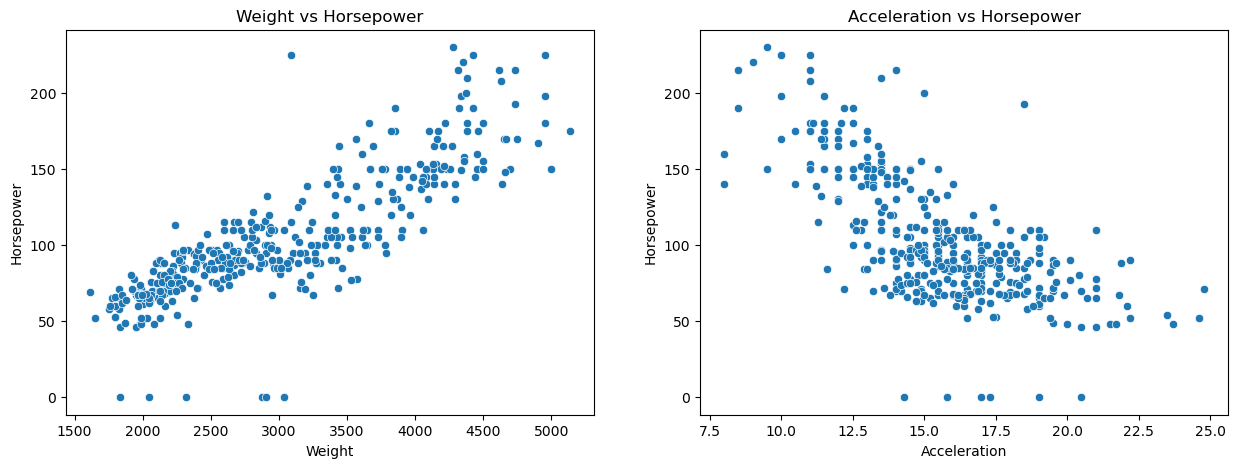

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.scatterplot(x = 'Weight', y = 'Horsepower', data  = df);
plt.title('Weight vs Horsepower')

plt.subplot(1,2,2)
sns.scatterplot(x = 'Acceleration', y = 'Horsepower', data  = df);
plt.title('Acceleration vs Horsepower')


# Histograms

Text(0.5, 1.0, 'Origin vs Weight')

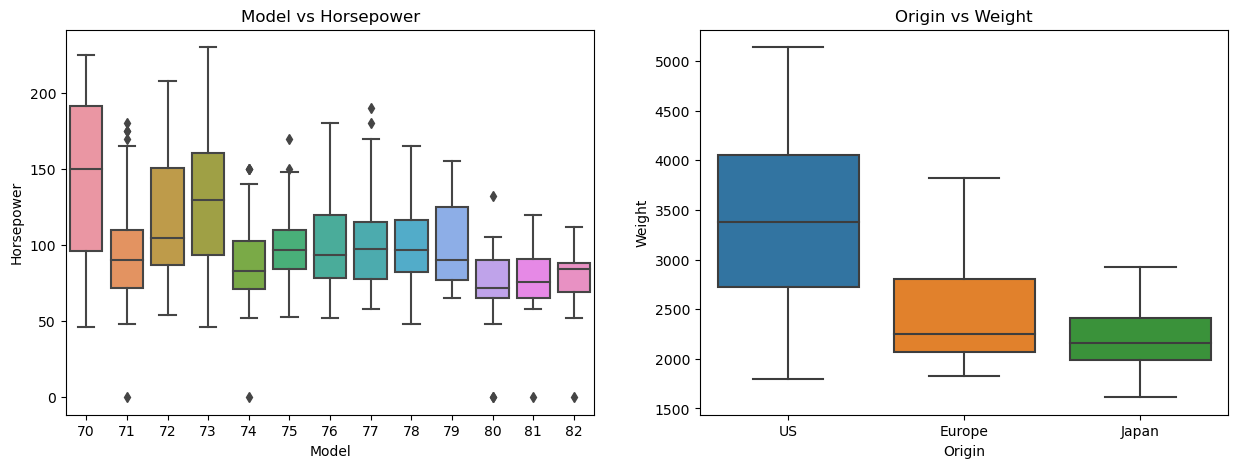

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Model', y = 'Horsepower', data  = df);
plt.title('Model vs Horsepower')

plt.subplot(1,2,2)
sns.boxplot(x = 'Origin', y = 'Weight', data  = df);
plt.title('Origin vs Weight')

# Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

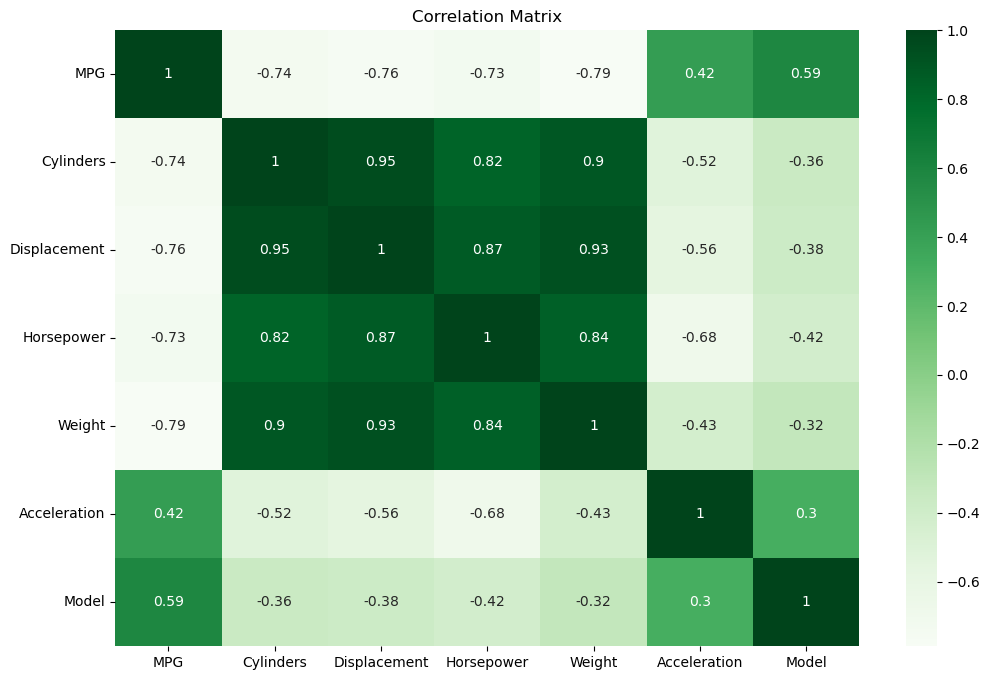

In [7]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation Matrix')

# Kmeans Clustering of MPG and Acceleration

Now I will try to do a Kmeans clustering of the car's MPG and Acceleration.

Here is the scatter plot of these variables.

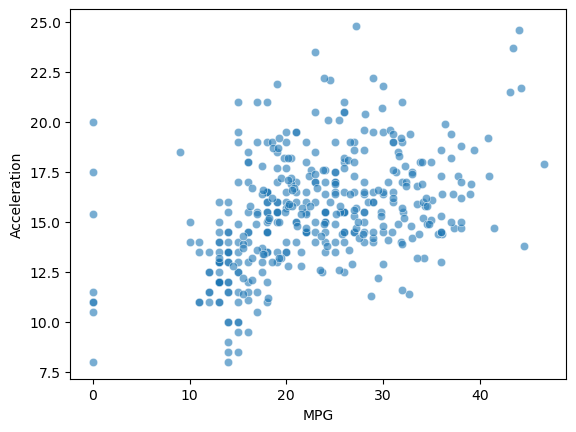

In [38]:
from sklearn import metrics
sns.scatterplot(x='MPG', y='Acceleration', data=df, alpha=0.6);

# 3,4,5,6 clusters Kmeans

Text(0.5, 1.0, '6 clusters Kmeans')

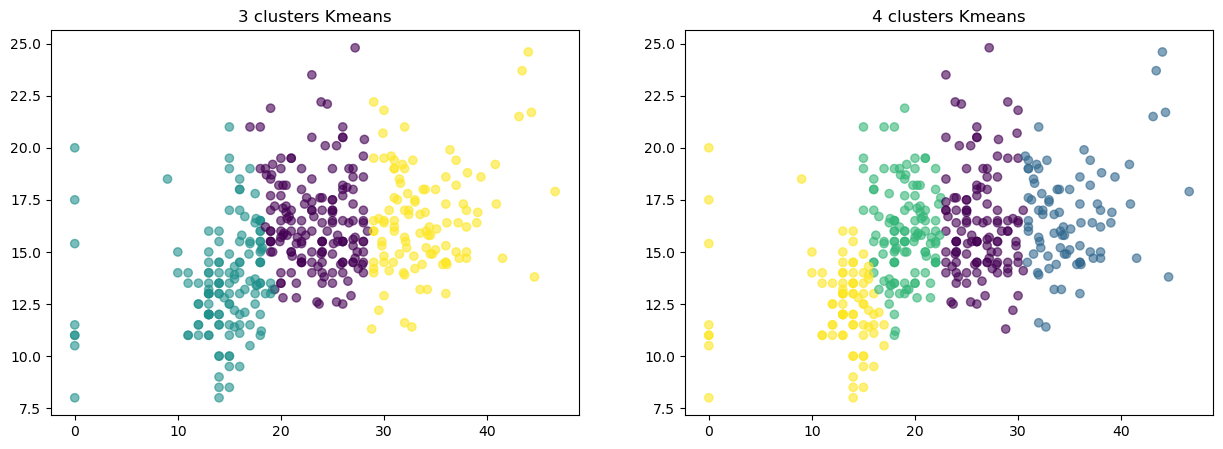

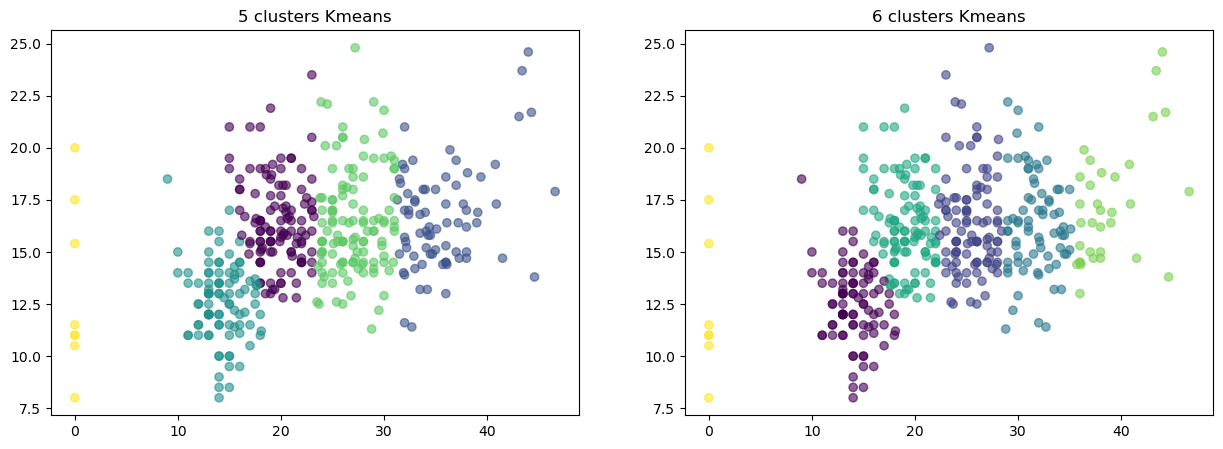

In [41]:
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['MPG', 'Acceleration']])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF', '#2000DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(df.MPG, df.Acceleration, alpha=0.6, c=kmeans.labels_.astype(float)/10)
plt.title('3 clusters Kmeans')

kmeans = KMeans(n_clusters=4)
df['cluster'] = kmeans.fit_predict(df[['MPG', 'Acceleration']])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF', '#2000DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

plt.subplot(1,2,2)
plt.scatter(df.MPG, df.Acceleration, alpha=0.6, c=kmeans.labels_.astype(float)/10)
plt.title('4 clusters Kmeans')

kmeans = KMeans(n_clusters=5)
df['cluster'] = kmeans.fit_predict(df[['MPG', 'Acceleration']])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF', '#2000DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(df.MPG, df.Acceleration, alpha=0.6, c=kmeans.labels_.astype(float)/10)
plt.title('5 clusters Kmeans')

kmeans = KMeans(n_clusters=6)
df['cluster'] = kmeans.fit_predict(df[['MPG', 'Acceleration']])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF', '#2000DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

plt.subplot(1,2,2)
plt.scatter(df.MPG, df.Acceleration, alpha=0.6, c=kmeans.labels_.astype(float)/10)
plt.title('6 clusters Kmeans')

# Silhouette Score of Clustering

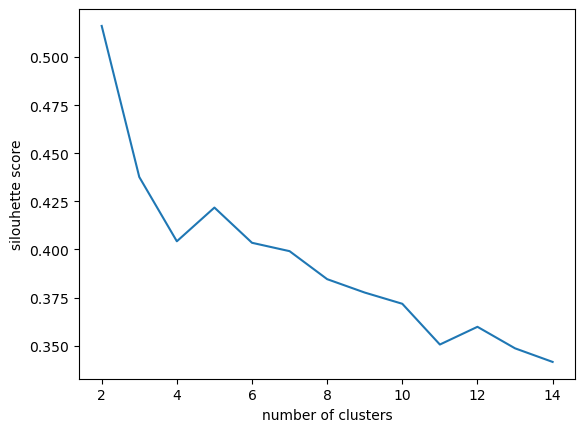

In [26]:
K = range(1, 15)
silouhette_scores = dict()

for k in K:
    kmeans = KMeans(n_clusters=k)
    df['cluster'] = kmeans.fit_predict(df[['MPG', 'Acceleration']])
    if (k <= 1):
        continue
    labels = kmeans.labels_
    silouhette_scores[k] = metrics.silhouette_score(df[['MPG', 'Acceleration']], labels, metric='euclidean')

plt.plot(K[1:], silouhette_scores.values())
plt.xlabel("number of clusters")
plt.ylabel("silouhette score")
plt.show()

# Elbow Method Score

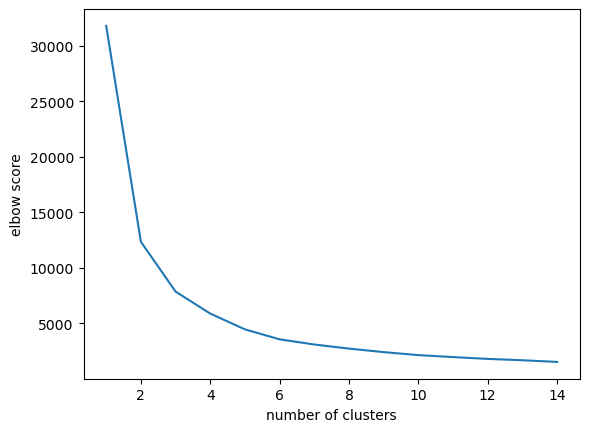

In [28]:
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++")
    df['cluster'] = kmeans.fit_predict(df[['MPG', 'Acceleration']])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})

plt.plot(K, wss)
plt.xlabel("number of clusters")
plt.ylabel("elbow score")
plt.show()